### Read good DM points in the MDEO

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

import pyslha
import pyMDEO_LesHouches_generator

import neutrino_analytic
import NEUTRINO2018

In [2]:
xd = pd.read_csv('good-DM-value.csv')
del[xd['Unnamed: 0']]

In [3]:
xd.shape

(137, 63)

In [4]:
xd[:3]

,Lam1,Lam2,Lam3,Lam4,Lam5,Lam6,Lam7,Lam8,Lam9,Lam10,...,mh2,theta,thetaf,T,S,U,g2mu,mChi,TWpSPheno,MZpSPheno
0,0.258166,0.000101,0.002271,0.008957,0.103938,0.001440,0.008291,0.047363,0.000238,0.000946,...,1741.397095,0.000635,5.070474,-9.593868e-08,1.598104e-07,3.119485e-07,-1.069976e-13,858.029119,-2.466117e-05,215.396359
1,0.258146,0.000310,0.105237,0.122123,41.032077,0.000069,0.151738,0.166120,0.000457,0.047615,...,2262.311066,0.000001,0.020552,1.858180e-06,2.776975e-06,2.699797e-07,2.159997e-14,247.966357,-2.115449e-07,190.400321
2,0.258146,0.164874,0.190281,0.097372,383.019834,0.000593,0.000569,0.052646,0.051295,0.021914,...,4432.247682,0.000002,3.689369,3.211363e-06,6.046971e-06,7.427106e-07,1.567583e-14,130.709533,-5.706523e-07,125.967562


In [5]:
# Tiempo inicial
t1=time.time() 

x=[]

Num = xd.shape[0]
#Num = 5

for i in range(0,Num):
    #print(i)
    #Open the dicctionary
    xdict = pyMDEO_LesHouches_generator.buildSLHAinFile()

    #Random parameters
    g1=3.55690247E-01
    g1p = xd['g1p'][i]
    epsilon = xd['epsilon'][i]
    g1p1 = 0.
    g11p = -g1*epsilon
    MZp = xd['MZp'][i]
    vX = xd['vX'][i]
    VEV = 246.220569
    
    theta = xd['theta'][i]
    gamma = 1.0/np.sqrt(1.0+np.tan(2.0*theta)**2.0)
    
    mh1=125.1
    mh2= xd['mh2'][i]
    Lam1=(0.5/VEV**2.0)*(mh1**2.0+mh2**2.0-gamma*(mh2**2.0-mh1**2.0))
    
    Lam2 = xd['Lam2'][i] #conj[Et].Et.conj[Et].Et
    Lam3 = xd['Lam3'][i] #conj[H].H.conj[Et].Et
    Lam4 = xd['Lam4'][i] #conj[H].Et.conj[Et].H
    Lam5 = (0.5/vX**2.0)*(mh1**2.0+mh2**2.0+gamma*(mh2**2.0-mh1**2.0)) ##conj[bi].bi.conj[bi].bi
    Lam6 = (0.5/(VEV*vX))*gamma*(mh2**2.0-mh1**2.0)*np.tan(2.0*theta) ##conj[bi].bi.conj[H].H
    Lam7 = xd['Lam7'][i] #conj[bi].bi.conj[Et].Et
    Lam8 = xd['Lam8'][i] ##conj[S].S.conj[S].S
    Lam9 = xd['Lam9'][i] #conj[S].S.conj[H].H
    Lam10 = xd['Lam10'][i] #conj[S].S.conj[bi].bi
    Lam11 = xd['Lam11'][i] ##conj[S].S.conj[Et].Et
    MS2 = xd['MS2'][i] #conj[S].S           
    Mn2 = xd['Mn2'][i] #mEt2 conj[Et].Et   
    Yc = xd['Yc'][i] # Yc bi.CL.CR
    muC = xd['muC'][i] #muC conj[H].Et.conj[S]

    xdict.blocks['MINPAR'].entries[1]='%.6E    # lambda1Input'%Lam1
    xdict.blocks['MINPAR'].entries[2]='%.6E    # lambda2Input'%Lam2
    xdict.blocks['MINPAR'].entries[3]='%.6E    # lambda3Input'%Lam3
    xdict.blocks['MINPAR'].entries[4]='%.6E    # lambda4Input'%Lam4
    xdict.blocks['MINPAR'].entries[5]='%.6E    # lambda5Input'%Lam5
    xdict.blocks['MINPAR'].entries[6]='%.6E    # lambda6Input'%Lam6
    xdict.blocks['MINPAR'].entries[7]='%.6E    # lambda7Input'%Lam7
    xdict.blocks['MINPAR'].entries[8]='%.6E    # lambda8Input'%Lam8
    xdict.blocks['MINPAR'].entries[9]='%.6E    # lambda9Input'%Lam9
    xdict.blocks['MINPAR'].entries[10]='%.6E    # lambda10Input'%Lam10
    xdict.blocks['MINPAR'].entries[11]='%.6E    # lambda11Input'%Lam11
    xdict.blocks['MINPAR'].entries[20]='%.6E    # g1pINPUT'%g1p
    xdict.blocks['MINPAR'].entries[21]='%.6E    # g1p1INPUT'%g1p1
    xdict.blocks['MINPAR'].entries[22]='%.6E    # g11pINPUT'%g11p
    xdict.blocks['MINPAR'].entries[23]='%.6E    # mEt2Input'%Mn2
    xdict.blocks['MINPAR'].entries[24]='%.6E    # MS2Input'%MS2
    xdict.blocks['MINPAR'].entries[30]='%.6E    # vXinput'%vX
    xdict.blocks['MINPAR'].entries[31]='%.6E    # Ycinput'%Yc
    xdict.blocks['MINPAR'].entries[32]='%.6E    # muCinput'%muC
    
    mChi = Yc*vX/np.sqrt(2.)
    
    MX1 = xd['mXi_1'][i]
    MX2 = xd['mXi_2'][i]
    thetaf = xd['thetaf'][i]
    gammaf = 1.0/np.sqrt(1.0+np.tan(2.0*thetaf)**2.0)
    YX11 = np.sqrt(2.0)/vX*0.5*(MX1+MX2-gammaf*(MX2-MX1)) #Yx bi.FxL.FxR
    YX22 = np.sqrt(2.0)/vX*0.5*(MX1+MX2+gammaf*(MX2-MX1))
    YX12 = np.sqrt(2.0)/vX*0.5*gammaf*(MX2-MX1)*np.tan(2.0*thetaf)
    YX21 = YX12
    #print('MX1=',MX1,'MX2=',MX2)
    
    xdict.blocks['YXIN'].entries[1,1]='%.6E    # YX(1,1)'%YX11
    xdict.blocks['YXIN'].entries[1,2]='%.6E    # YX(1,2)'%YX12
    xdict.blocks['YXIN'].entries[2,1]='%.6E    # YX(2,1)'%YX21
    xdict.blocks['YXIN'].entries[2,2]='%.6E    # YX(2,2)'%YX22

    #Rotation matrices and Yukawas after inversion
    #FMa = neutrino_analytic.MATFermionXi(YX11,YX12,YX21,YX22,vX)
    #SMa = neutrino_analytic.MATSalarS0(Lam3,Lam4,Lam7,Lam9,Lam10,vX,VEV,muC,MS2,Mn2)
    #YUKS = neutrino_analytic.Yukawas(NEUTRINO2018.nuexpvalues(),FMa,SMa)

    YnL11 = xd['YnL11'][i]
    YnL12 = xd['YnL12'][i]
    YnL13 = xd['YnL13'][i]
    YnL21 = xd['YnL21'][i]
    YnL22 = xd['YnL22'][i]
    YnL23 = xd['YnL23'][i]
    YnR11 = xd['YnR11'][i]
    YnR12 = xd['YnR12'][i]
    YnR13 = xd['YnR13'][i]
    YnR21 = xd['YnR21'][i]
    YnR22 = xd['YnR22'][i]
    YnR23 = xd['YnR23'][i]

    ZL11 = xd['ZL11'][i]
    ZL12 = xd['ZL12'][i]
    ZL21 = xd['ZL21'][i]
    ZL22 = xd['ZL22'][i]
    ZR11 = xd['ZR11'][i]
    ZR12 = xd['ZR12'][i]
    ZR21 = xd['ZR21'][i]
    ZR22 = xd['ZR22'][i]
    mXi_1 = xd['mXi_1'][i]
    mXi_2 = xd['mXi_2'][i]

    ZN11 = xd['ZN11'][i]
    ZN12 = xd['ZN12'][i]
    ZN21 = xd['ZN21'][i]
    ZN22 = xd['ZN22'][i]
    mns_1 = xd['mns_1'][i]
    mns_2 = xd['mns_2'][i]

    ##hdij->YnLij
    xdict.blocks['YNLIN'].entries[1,1]='%.6E    # YnL(1,1)'%YnL11
    xdict.blocks['YNLIN'].entries[1,2]='%.6E    # YnL(1,2)'%YnL12
    xdict.blocks['YNLIN'].entries[1,3]='%.6E    # YnL(1,3)'%YnL13
    xdict.blocks['YNLIN'].entries[2,1]='%.6E    # YnL(2,1)'%YnL21
    xdict.blocks['YNLIN'].entries[2,2]='%.6E    # YnL(2,2)'%YnL22
    xdict.blocks['YNLIN'].entries[2,3]='%.6E    # YnL(2,3)'%YnL23
    ##heij->YnRij
    xdict.blocks['YNRIN'].entries[1,1]='%.6E    # YnR(1,1)'%YnR11
    xdict.blocks['YNRIN'].entries[1,2]='%.6E    # YnR(1,2)'%YnR12
    xdict.blocks['YNRIN'].entries[1,3]='%.6E    # YnR(1,3)'%YnR13
    xdict.blocks['YNRIN'].entries[2,1]='%.6E    # YnR(2,1)'%YnR21
    xdict.blocks['YNRIN'].entries[2,2]='%.6E    # YnR(2,2)'%YnR22
    xdict.blocks['YNRIN'].entries[2,3]='%.6E    # YnR(2,3)'%YnR23

    #Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.MDEO_low',xdict)
    
    #run SPheno
    #spheno = subprocess.getoutput('~/Downloads/Tesis/Automatic_Submodules_MDEO/SPHENO/bin/SPhenoMDEO LesHouches.in.MDEO_low')
    spheno = subprocess.getoutput('../.././SPheno-4.0.5/bin/SPhenoMDEO LesHouches.in.MDEO_low')
    so = subprocess.getoutput('cat SPheno.spc.MDEO')
    
    T = eval(so.split('Block SPhenoLowEnergy #')[1].split()[4])
    S = eval(so.split('Block SPhenoLowEnergy #')[1].split()[10])
    U = eval(so.split('Block SPhenoLowEnergy #')[1].split()[16])
    g2mu = eval(so.split('Block SPhenoLowEnergy #')[1].split()[26])
    TWpSPheno = eval(so.split('Block ANGLES Q')[1].split()[6])
    MZpSPheno = eval(so.split('# VWm')[1].split()[1])
    
    #run micromegas.
    #mo = subprocess.getoutput('~/Work/micromegas_5.0.6/MDEO/./CalcOmega_with_DI_Detection')#with_direct_detection
    
    Omega1=xd['Omega1'][i]
    Omega2=xd['Omega2'][i]
    SIN1=xd['SIN1'][i]
    SIN2=xd['SIN2'][i]
    sv=xd['sv'][i]
    
    subprocess.getoutput('cp SPheno.spc.MDEO SPheno.spc.MDEO1DM')
    mo2 = subprocess.getoutput('~/Work/micromegas_5.0.6/MDEO1DM/./CalcOmega')
    
    if len(mo2.split()) == 2:
        continue
        
    Omega3 = eval(mo2.split('Omega h^2=')[1].split()[0])
    Xf=eval(mo2.split('Xf=')[1].split()[0])
    
    Chan1= mo2.split('# Relative contributions in % are displayed')[1].splitlines()[1]
    if len(mo2.split('# Relative contributions in % are displayed')[1].splitlines()) <=2:
        Chan2=0
    else:    
        Chan2= mo2.split('# Relative contributions in % are displayed')[1].splitlines()[2]

    if len(mo2.split('# Relative contributions in % are displayed')[1].splitlines()) <=3:
        Chan3=0
    else:    
        Chan3= mo2.split('# Relative contributions in % are displayed')[1].splitlines()[3]    
    
    x.append([Lam1,Lam2,Lam3,Lam4,Lam5,Lam6,Lam7,Lam8,Lam9,Lam10,Lam11,MS2,Mn2,vX,Yc,muC,g1p,epsilon,\
              ZL11,ZL12,ZL21,ZL22,ZR11,ZR12,ZR21,ZR22,\
          ZN11,ZN12,ZN21,ZN22,mXi_1,mXi_2,mns_1,mns_2,YnL11,YnL12,YnL13,YnL21,YnL22,YnL23,\
          YnR11,YnR12,YnR13,YnR21,YnR22,YnR23,Omega1,Omega2,SIN1,SIN2,sv,MZp,mh1,mh2,theta,thetaf,T,S,U,\
              g2mu,mChi,TWpSPheno,MZpSPheno,Omega3,Xf,Chan1,Chan2,Chan3])

x=np.asarray(x)

xDM=pd.DataFrame(x,columns=['Lam1','Lam2','Lam3','Lam4','Lam5','Lam6','Lam7','Lam8','Lam9',\
                           'Lam10','Lam11','MS2','Mn2','vX','Yc','muC','g1p','epsilon',\
                           'ZL11','ZL12','ZL21','ZL22','ZR11','ZR12','ZR21','ZR22','ZN11',\
                           'ZN12','ZN21','ZN22','mXi_1','mXi_2','mns_1','mns_2','YnL11',\
                           'YnL12','YnL13','YnL21','YnL22','YnL23','YnR11','YnR12','YnR13',\
                           'YnR21','YnR22','YnR23','Omega1','Omega2','SIN1','SIN2','sv',\
                           'MZp','mh1','mh2','theta','thetaf','T','S','U','g2mu','mChi',\
                           'TWpSPheno','MZpSPheno','Omega3','Xf','Chan1','Chan2','Chan3'])

t2=time.time() 
print ("The program spent", t2-t1, "s running",Num,"times")   

The program spent 127.25990962982178 s running 137 times


In [6]:
xDM[:3]

,Lam1,Lam2,Lam3,Lam4,Lam5,Lam6,Lam7,Lam8,Lam9,Lam10,...,U,g2mu,mChi,TWpSPheno,MZpSPheno,Omega3,Xf,Chan1,Chan2,Chan3
0,0.25816637233166295,0.0001011191389705,0.002271312400927,0.0089567363422275,0.10393847512591403,0.0014395254777283854,0.0082912237189,0.0473625521593517,0.0002383316007203,0.0009459469561739,...,3.08502149e-07,-1.06978014e-13,858.0291193232264,0.0,215.396394,0.0549,28.5,100% ~chi ~Chi ->Zp Zp,0,0
1,0.2581463319043303,0.000310092707188,0.1052369974989605,0.1221226392718344,41.032076976659305,6.88881727585276e-05,0.1517377895856117,0.166119679690712,0.0004572864289796,0.0476150777287459,...,2.69975904e-07,2.15999721e-14,247.96635685079687,0.0,190.400313,0.0587,26.5,42% ~chi ~Chi ->Xi1 xi1,29% ~chi ~Chi ->Xi2 xi2,23% ~chi ~Chi ->Zp Zp
2,0.2581463327084841,0.1648738275876759,0.1902810285599954,0.0973724239383971,383.0198336709767,0.0005934249668023934,0.0005690545089841,0.0526457770546881,0.0512951904760493,0.0219141903171791,...,7.42709052e-07,1.56758311e-14,130.70953284314191,0.0,125.967551,0.105,25.6,50% ~chi ~Chi ->Zp Zp,17% ~chi ~Chi ->nu1 Nu1,17% ~chi ~Chi ->nu2 Nu2


In [7]:
xDM.shape

(137, 68)

In [9]:
#save
#xDM.to_csv('Omega3-with-xf.csv')

#Read file runned
xDM = pd.read_csv('Omega3-with-xf.csv')
del[xDM['Unnamed: 0']]

In [10]:
xDM.shape

(137, 68)

In [13]:
xDM[['Omega1','Omega2','Omega3','mXi_1','mXi_2','mns_1','mns_2']][:5]

,Omega1,Omega2,Omega3,mXi_1,mXi_2,mns_1,mns_2
0,0.0554,0.063100,0.0549,864.615681,1619.848411,2284.259271,5475.226666
1,0.0846,0.031000,0.0587,249.864867,251.362270,1695.865067,5824.338144
2,0.1050,0.006560,0.1050,263.110820,264.122760,3512.017352,5442.444635
3,0.0694,0.048000,0.0678,707.288541,947.839170,2250.788996,4267.913505
4,0.1130,0.000008,0.1120,1476.488745,1480.812841,1627.340505,3618.642637


In [14]:
xDM[['Omega1','Omega3','Chan1','Chan2','Chan3']][100:150]

,Omega1,Omega3,Chan1,Chan2,Chan3
100,0.0553,0.0537,98% ~chi ~Chi ->Zp Zp,2% ~chi ~Chi ->Xi1 xi1,0
101,0.1130,0.1070,76% ~chi ~Chi ->Zp Zp,7% ~chi ~Chi ->nu1 Nu1,7% ~chi ~Chi ->nu2 Nu2
102,0.1140,0.1140,82% ~chi ~Chi ->NS1 NS1,16% ~chi ~Chi ->h2 Zp,0
103,0.0594,0.0543,91% ~chi ~Chi ->Zp Zp,6% ~chi ~Chi ->Xi1 xi1,3% ~chi ~Chi ->Xi2 xi2
104,0.1090,0.1080,50% ~chi ~Chi ->Zp Zp,17% ~chi ~Chi ->nu1 Nu1,17% ~chi ~Chi ->nu2 Nu2
105,0.1220,0.6410,97% ~chi ~Chi ->Zp Zp,3% ~chi ~Chi ->h2 Zp,0
106,0.1150,23.3000,100% ~chi ~Chi ->NS1 NS1,0,0
107,0.1180,0.1170,45% ~chi ~Chi ->Zp Zp,18% ~chi ~Chi ->nu1 Nu1,18% ~chi ~Chi ->nu2 Nu2
108,0.1070,0.1060,85% ~chi ~Chi ->Zp Zp,5% ~chi ~Chi ->nu1 Nu1,5% ~chi ~Chi ->nu2 Nu2
109,0.1030,0.0985,53% ~chi ~Chi ->Zp Zp,14% ~chi ~Chi ->nu1 Nu1,14% ~chi ~Chi ->nu2 Nu2


In [15]:
#Experimental values for DM:Planck results 2018
e = 10
Omega = 0.1200
Omega_min=Omega - e*0.0012
Omega_max=Omega + e*0.0012
print( Omega_min, Omega,Omega_max)

0.108 0.12 0.132


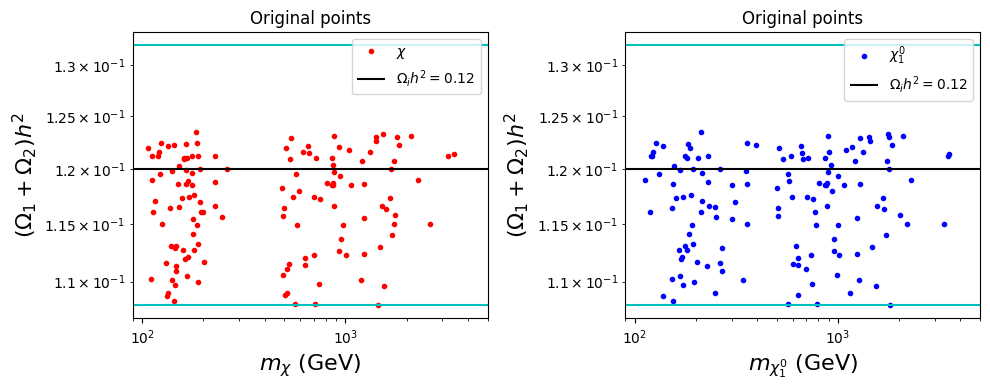

In [16]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.loglog(xd.mChi,(xd.Omega1+xd.Omega2),'r.',label='$\chi$')

plt.hlines(Omega_max,1,1e4, 'c',label=r'')
plt.hlines(Omega_min,1,1e4, 'c',label=r'')
plt.hlines(Omega,1,1e4, 'k',label=r'$\Omega_i h^2=$0.12')

plt.xlabel(r'$m_{\chi}$ (GeV)',size=16)
plt.ylabel(r'$(\Omega_1 + \Omega_2) h^2$',size=16)
plt.legend()
plt.title('Original points')
plt.xlim(90,5e3)

#plt.ylim(Omega_min,Omega_max)
#plt.ylim(0.10,0.15)

plt.subplot(122)
plt.loglog(xd.mXi_1,(xd.Omega1+xd.Omega2),'b.',label='$\chi_1^0$')

plt.hlines(Omega_max,1,1e4, 'c',label=r'')
plt.hlines(Omega_min,1,1e4, 'c',label=r'')
plt.hlines(Omega,1,1e4, 'k',label=r'$\Omega_i h^2=$0.12')

plt.xlabel(r'$m_{\chi_1^0}$ (GeV)',size=16)
plt.ylabel(r'$(\Omega_1 + \Omega_2) h^2$',size=16)
plt.legend()
plt.title('Original points')
plt.xlim(90,5e3)

#plt.ylim(Omega_min,Omega_max)
#plt.ylim(0.10,0.15)

plt.tight_layout()

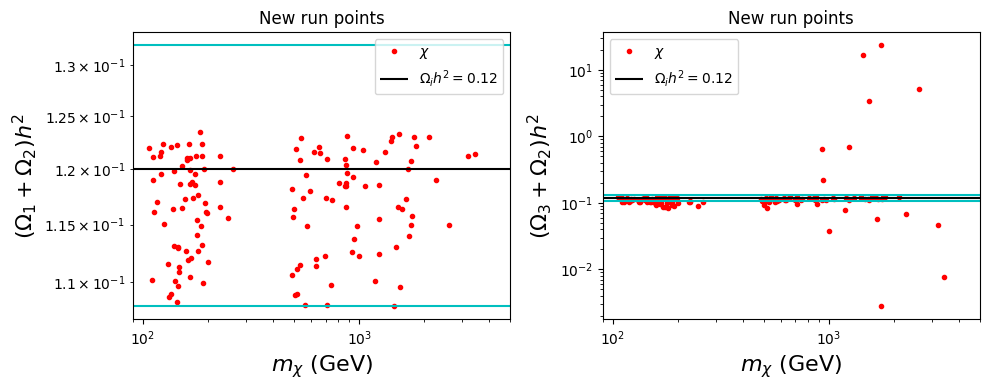

In [17]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.loglog(xd.mChi,(xd.Omega1+xd.Omega2),'r.',label='$\chi$')

plt.hlines(Omega_max,1,1e4, 'c',label=r'')
plt.hlines(Omega_min,1,1e4, 'c',label=r'')
plt.hlines(Omega,1,1e4, 'k',label=r'$\Omega_i h^2=$0.12')

plt.xlabel(r'$m_{\chi}$ (GeV)',size=16)
plt.ylabel(r'$(\Omega_1 + \Omega_2) h^2$',size=16)
plt.legend()
plt.title('New run points')
plt.xlim(90,5e3)

#plt.ylim(Omega_min,Omega_max)
#plt.ylim(0.10,0.15)

plt.subplot(122)

plt.loglog(xd.mChi,(xDM.Omega3+xDM.Omega2),'r.',label='$\chi$')

plt.hlines(Omega_max,1,1e4, 'c',label=r'')
plt.hlines(Omega_min,1,1e4, 'c',label=r'')
plt.hlines(Omega,1,1e4, 'k',label=r'$\Omega_i h^2=$0.12')

plt.xlabel(r'$m_{\chi}$ (GeV)',size=16)
plt.ylabel(r'$(\Omega_3 + \Omega_2) h^2$',size=16)
plt.legend()
plt.title('New run points')
plt.xlim(90,5e3)

#plt.ylim(Omega_min,Omega_max)
#plt.ylim(0.10,0.15)

plt.tight_layout()

WARNING: After running, micrOmegas does no compute exactly the same relic density because we lose $mn^2$ and $mS^2$ parameters

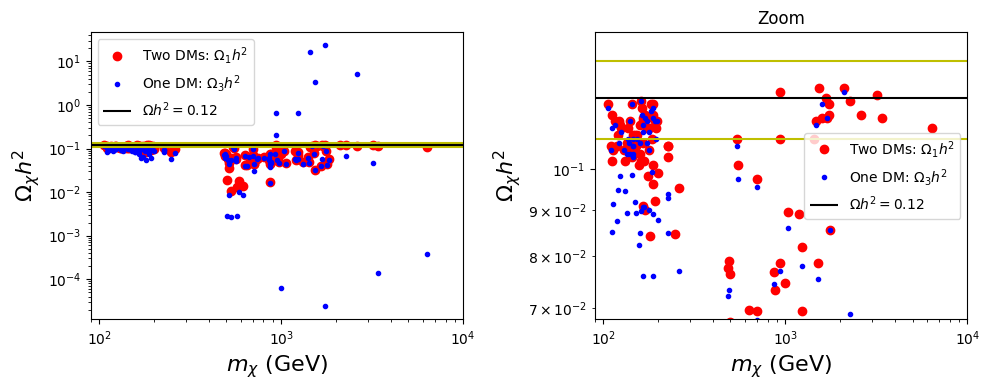

In [19]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.loglog(xd.mChi,xd.Omega1,'ro',label='Two DMs: $\Omega_{1} h^2$')
plt.loglog(xDM.mChi,xDM.Omega3,'b.',label='One DM: $\Omega_{3} h^2$')

plt.hlines(Omega_max,1,1e4, 'y',label=r'')
plt.hlines(Omega_min,1,1e4, 'y',label=r'')
plt.hlines(Omega,1,1e4, 'k',label=r'$\Omega h^2=$0.12')

plt.xlabel(r'$m_\chi$ (GeV)',size=16)
plt.ylabel(r'$\Omega_{\chi} h^2$',size=16)
plt.legend()

plt.xlim(90,1e4)
#plt.ylim(Omega_min,Omega_max)
#plt.ylim(1e-2,Omega_max+0.01)

plt.subplot(122)
plt.loglog(xd.mChi,xd.Omega1,'ro',label='Two DMs: $\Omega_{1} h^2$')
plt.loglog(xDM.mChi,xDM.Omega3,'b.',label='One DM: $\Omega_{3} h^2$')

plt.hlines(Omega_max,1,1e4, 'y',label=r'')
plt.hlines(Omega_min,1,1e4, 'y',label=r'')
plt.hlines(Omega,1,1e4, 'k',label=r'$\Omega h^2=$0.12')

plt.xlabel(r'$m_\chi$ (GeV)',size=16)
plt.ylabel(r'$\Omega_{\chi} h^2$',size=16)
plt.legend()
plt.title('Zoom')

plt.xlim(90,1e4)
plt.ylim(Omega_min-0.04,Omega_max+0.01)
#plt.ylim(1e-2,Omega_max+0.01)

plt.tight_layout()

In the last figure we can see that for $m_{\chi}\sim 1$ TeV micrOmegas with only one DM candidate compute an sub-abundance of DM (blue points). It means that in the model with two DM candates there is a DM conversion $\chi \to \chi_1^0$ which fall down the DM abundance  of $\chi$ to the red points giving at the end the correct observed relic density.

Micromegas always take the light particle between $\chi$ and $\Xi_1^0$

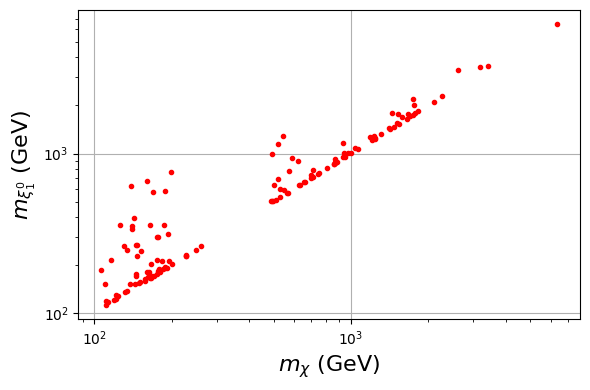

In [20]:
plt.figure(figsize=(6,4))

plt.loglog(xDM.mChi,xDM['mXi_1'],'r.',label='')

plt.xlabel(r'$m_{\chi}$ (GeV)',size=16)
plt.ylabel(r'$m_{\xi_1^0}$ (GeV)',size=16)
plt.grid()

plt.tight_layout()

for micrOmegas $\chi$ was the lightes particle. It means that the rutine with only one candidate takes $\chi$ and therefore $\Omega_3=\Omega_1$

filter

In [21]:
kk = xDM[np.logical_and(xDM.Omega2+xDM.Omega3 > Omega_min,xDM.Omega2+xDM.Omega3 < Omega_max)]

kk = kk.reset_index()
del[kk['index']]

In [22]:
kk.shape

(82, 68)

In [25]:
kk[['mChi','Omega1','Omega3','Xf','Chan1','Chan2','Chan3']][0:50]

,mChi,Omega1,Omega3,Xf,Chan1,Chan2,Chan3
0,858.029119,0.0554,0.05490,28.5,100% ~chi ~Chi ->Zp Zp,0,0
1,130.709533,0.1050,0.10500,25.6,50% ~chi ~Chi ->Zp Zp,17% ~chi ~Chi ->nu1 Nu1,17% ~chi ~Chi ->nu2 Nu2
2,700.675230,0.0694,0.06780,28.3,98% ~chi ~Chi ->Zp Zp,2% ~chi ~Chi ->Xi1 xi1,0
3,1473.051972,0.1130,0.11200,28.9,100% ~chi ~Chi ->NS1 NS1,0,0
4,140.592080,0.1050,0.10400,25.6,66% ~chi ~Chi ->Zp Zp,11% ~chi ~Chi ->nu1 Nu1,11% ~chi ~Chi ->nu2 Nu2
5,975.366954,0.0501,0.04650,28.6,100% ~chi ~Chi ->Zp Zp,0,0
6,1415.773034,0.0484,0.04680,28.8,98% ~chi ~Chi ->Zp Zp,2% ~chi ~Chi ->Xi1 xi1,0
7,160.073798,0.1120,0.10700,25.7,84% ~chi ~Chi ->Zp Zp,5% ~chi ~Chi ->nu1 Nu1,5% ~chi ~Chi ->nu2 Nu2
8,1313.368897,0.0490,0.04510,28.9,94% ~chi ~Chi ->Zp Zp,3% ~chi ~Chi ->Xi1 xi1,3% ~chi ~Chi ->Xi2 xi2
9,111.080880,0.1150,0.11100,25.3,65% ~chi ~Chi ->Zp Zp,11% ~chi ~Chi ->nu1 Nu1,11% ~chi ~Chi ->nu2 Nu2


## Anility relic density $\Omega h^2$